<a href="https://colab.research.google.com/github/naren-17/BOOTCAMP/blob/main/Day9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.4 MB/s eta 0:00:00


### **Task 1**

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


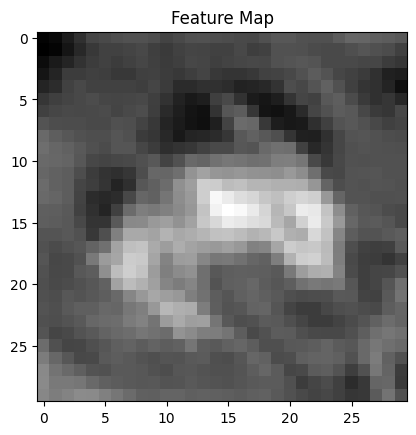

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from langchain_community.document_loaders import DirectoryLoader, PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS
from langchain.chains import RetrievalQA
from langchain.llms import CTransformers
import os

# Task 1: CNN Convolution Step
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train_gray = np.mean(x_train, axis=-1, keepdims=True).astype(np.float32) / 255.0  # Convert to grayscale

# Select 1 image
image = x_train_gray[0:1, :, :, :]  # Shape: (1, 32, 32, 1)

# Define a 3x3 filter
filter_weights = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]], dtype=np.float32).reshape(3, 3, 1, 1)

# Apply convolution
feature_map = tf.nn.conv2d(image, filters=filter_weights, strides=1, padding='VALID')

# Visualize feature map
plt.imshow(feature_map.numpy().squeeze(), cmap='gray')
plt.title("Feature Map")
plt.show()

### **Task 2**

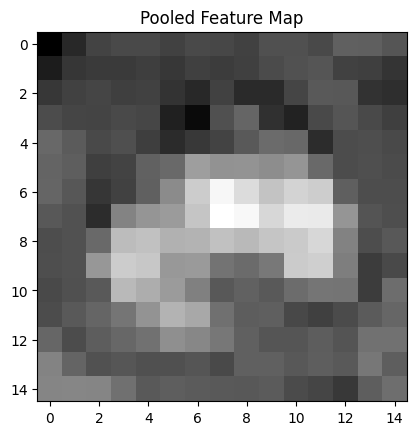

In [ ]:
activated_map = tf.nn.relu(feature_map)
pooled_map = tf.nn.max_pool(activated_map, ksize=2, strides=2, padding='VALID')

plt.imshow(pooled_map.numpy().squeeze(), cmap='gray')
plt.title("Pooled Feature Map")
plt.show()

### **Task 3**

In [ ]:
y_train = (y_train < 2).astype(int)
y_train_cat = to_categorical(y_train, num_classes=2)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(3, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_gray, y_train_cat, epochs=5, batch_size=32)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.7996 - loss: 0.4845
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8120 - loss: 0.4201
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8190 - loss: 0.4055
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8233 - loss: 0.3955
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8290 - loss: 0.3843


In [ ]:
!pip install -U langchain-community langchain faiss-cpu sentence-transformers pypdf


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu